<a href="https://colab.research.google.com/github/chiarabaruae/TPBIGDATA/blob/main/Trabajo_Final_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COMPONENTE 1**

In [23]:
!pip install config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
 

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import re
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
TWITTER_CONSUMER_KEY = 'e27sd02R39EIsSHfrTUCiOwXT'
TWITTER_CONSUMER_SECRET = 'X0K7qJC7lZ9An1NXWJ3yYijOp4tAFPWcd3OjcBP15djPe9m5KZ'
TWITTER_ACCESS_TOKEN = '175984347-MCv5cbRKRBxXOFKDUfsQVtGhuPy42aRDn53UWP4L'
TWITTER_ACCESS_TOKEN_SECRET = 'XMEe25XGwoeozruLf9Y1zK5wYlTup9U0xLHLG4BT3JffE'

In [5]:
auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [6]:
hashtag = input("Ingrese el tema del tweet=")
numerotweets = int(input("Cuantos tweets desea buscar? "))


Ingrese el tema del tweet=Puppy
Cuantos tweets desea buscar? 10


In [7]:
tweets_list = tweepy.Cursor(api.search, q=hashtag, lang='en').items(numerotweets)
output = []
for tweet in tweets_list:
    text = tweet.text
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    author = tweet.user.screen_name
    line = {'tweet' : text, 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at,"autor":author}
    output.append(line)


In [17]:
tweets = pd.DataFrame(output)
tweets.to_csv("datasetPuppy.csv")

**COMPONENTE 2**

In [9]:
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)
def cleanTxt(text):
 text = re.sub('\s([@#][\w_-]+)|@[A-Za-z0-9]+|@([a-zA-Z0-9_]{1,50})', '', text) #Removing @mentions
 text = re.sub('RT:[\s]+', '', text) # Removing RT
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub("\n",'',text) # Remove newlines
 text = re.sub(r'[^\w\s]', '', text) #Remove punctuations
 text = remove_emojis(text) 
 return  ' '.join([word for word in word_tokenize(text) if not word in stopwords.words("english")]).lower()
tweets["cleaned tweet"] = tweets["tweet"].apply(cleanTxt)


In [10]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

tweets['POS tagged'] = tweets['cleaned tweet'].apply(token_stop_pos)


In [11]:
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
tweets["Lemma"] = tweets["POS tagged"].apply(lemmatize)


In [12]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
def vader_analysis(compound):
    if compound >= 0.1:
        return 'Positive'
    elif compound <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'
tweets['Sentiment'] = tweets['Lemma'].apply(vadersentimentanalysis)
tweets['Analysis'] = tweets['Sentiment'].apply(vader_analysis)


In [18]:
tweets.to_csv("datasetPuppyAnalysed.csv")

In [14]:
tweets["Sentiment"].mean()

tweets["Analysis"].value_counts()


Positive    5
Neutral     5
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fab8b65d190>,
 [Text(6.735557395310444e-17, 1.1, 'Positive'),
  Text(-2.0206672185931328e-16, -1.1, 'Neutral')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

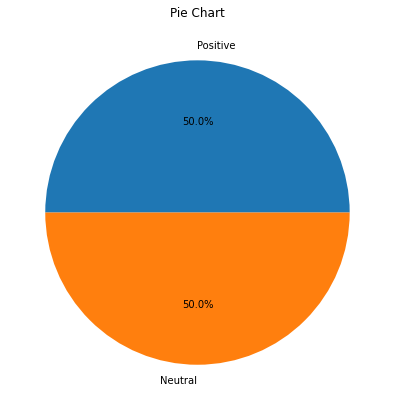

In [15]:
plt.figure(figsize=(10, 7))
plt.title("Pie Chart")
plt.pie(tweets['Analysis'].value_counts().values, labels = tweets['Analysis'].value_counts().index, autopct='%1.1f%%', shadow=False)